# Second db

In [ ]:
import os

# create and save the results
save_dir = "/content/new_knots_svg/"
try:
    os.makedirs(save_dir)
except FileExistsError:
    print(f"One or more directories in '{save_dir}' already exist.")
except PermissionError:
    print(f"Permission denied: Unable to create '{save_dir}'.")
except Exception as e:
    print(f"An error occurred: {e}")

save_dir = "/content/new_knots_png/"
try:
    os.makedirs(save_dir)
except FileExistsError:
    print(f"One or more directories in '{save_dir}' already exist.")
except PermissionError:
    print(f"Permission denied: Unable to create '{save_dir}'.")
except Exception as e:
    print(f"An error occurred: {e}")

save_dir = "/content/new_knots_different/"
try:
    os.makedirs(save_dir)
except FileExistsError:
    print(f"One or more directories in '{save_dir}' already exist.")
except PermissionError:
    print(f"Permission denied: Unable to create '{save_dir}'.")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
!pip install cairosvg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.1 MB/s eta 0:00:00


In [ ]:
# db from https://prideout.net/blog/svg_knots
import urllib.request
import cairosvg
from PIL import Image

knots_count_1 = [1, 0, 0, 1, 1, 2, 3, 7, 21, 49, 3] # number of knots with i crossings represented on the https://prideout.net/blog/svg_knots/knottable_v1.svg

IMG_SIZE = 480 # size of the output image in px; influences on the complexity of the filling
               # 480 is size of picture from our 801-knots database so we can use that one too

for cross_num in range(len(knots_count_1)):
  for i in range(knots_count_1[cross_num]):
    url = f"https://prideout.net/blog/svg_knots/knots/{cross_num}_{i+1}.svg"
    full_path = f"/content/new_knots_svg/{cross_num}_{i+1}.svg"
    urllib.request.urlretrieve(url, full_path)

    # svg to png
    cairosvg.svg2png(bytestring=open(f"/content/new_knots_svg/{cross_num}_{i+1}.svg", 'rb').read(), write_to=f"/content/new_knots_png/{cross_num}_{i+1}.png", output_width=IMG_SIZE, output_height=IMG_SIZE)

    # fill png with white
    bg = Image.new("RGB", (IMG_SIZE, IMG_SIZE), "WHITE")
    fg = Image.open(f"/content/new_knots_png/{cross_num}_{i+1}.png")
    bg.paste(fg, (0, 0), fg)
    bg.save(f"/content/new_knots_png/{cross_num}_{i+1}.png")

    # clear the image of errors
    pixels_bg = bg.load()
    img = Image.new(bg.mode, bg.size)
    pixels = img.load()
    for x in range(IMG_SIZE):
      for y in range(IMG_SIZE):
        if(x == 0 or y == 0 or x == IMG_SIZE-1 or y == IMG_SIZE-1):
          pixels[x, y] = (255, 255, 255)
        else:
          if(pixels_bg[x-1, y-1] <= (30, 30, 30) or
             pixels_bg[x-1, y] <= (30, 30, 30) or
             pixels_bg[x-1, y+1] <= (30, 30, 30) or
             pixels_bg[x, y-1] <= (30, 30, 30) or
             pixels_bg[x, y] <= (30, 30, 30) or
             pixels_bg[x, y+1] <= (30, 30, 30) or
             pixels_bg[x+1, y-1] <= (30, 30, 30) or
             pixels_bg[x+1, y] <= (30, 30, 30) or
             pixels_bg[x+1, y+1] <= (30, 30, 30)
             ):
            pixels[x, y] = (0, 0, 0)
          else:
            pixels[x, y] = (255, 255, 255)
    img.save(f"/content/new_knots_png/{cross_num}_{i+1}.png")

ModuleNotFoundError: No module named 'cairosvg'

In [ ]:
def sum_bound(x, arr):
  s = 0
  for i in range(len(arr)):
    if(s + arr[i] >= x):
      return (s, i)
    else:
      s += arr[i]

In [ ]:
# db from https://github.com/annedranowski/bishop/tree/main
import requests
from requests.structures import CaseInsensitiveDict

knots_count_2 = [1, 1, 2, 3, 7, 21, 49, 165, 552, 2176, 9988, 46972, 253293, 1388705, 8053393, 48266466, 294130458]

# Your token; requires full repo list marked while creating
GIT_TOKEN =

# Variables
GH_PREFIX = "https://raw.githubusercontent.com"
ORG = "annedranowski"
REPO = "bishop"
BRANCH = "main"
FOLDER = "knots"
SAVE_DIR = "/content/new_knots_png/"

N = 801 # number of knots represented in github database

for k in range(1, N):
  FILE_NAME = f"knot_{k}.png"

  # i belongs to interval [k_int, k_int+1)
  k_int = sum_bound(k, knots_count_2)[1] + 3

  # Destination URL
  URL = GH_PREFIX + "/" + ORG + "/" + REPO + "/" + BRANCH + "/" + FOLDER + "/" + FILE_NAME

  # Headers setup
  headers = CaseInsensitiveDict()
  headers["Authorization"] = "token " + GIT_TOKEN

  # Execute and view status
  resp = requests.get(URL, headers=headers)
  if resp.status_code == 200:
    a = knots_count_1[k_int] if k_int < len(knots_count_1) else 0
    with open(SAVE_DIR + f"{k_int}_{k - sum_bound(k, knots_count_2)[0] + a}.png", "wb") as f:
      f.write(resp.content)
  else:
    print(f"File {FILE_NAME} does not exist.")

File knot_1.png does not exist.
File knot_2.png does not exist.
File knot_3.png does not exist.
File knot_4.png does not exist.
File knot_5.png does not exist.
File knot_6.png does not exist.
File knot_7.png does not exist.
File knot_8.png does not exist.
File knot_9.png does not exist.
File knot_10.png does not exist.
File knot_11.png does not exist.
File knot_12.png does not exist.
File knot_13.png does not exist.
File knot_14.png does not exist.
File knot_15.png does not exist.
File knot_16.png does not exist.
File knot_17.png does not exist.
File knot_18.png does not exist.
File knot_19.png does not exist.
File knot_20.png does not exist.
File knot_21.png does not exist.
File knot_22.png does not exist.
File knot_23.png does not exist.
File knot_24.png does not exist.
File knot_25.png does not exist.
File knot_26.png does not exist.
File knot_27.png does not exist.
File knot_28.png does not exist.
File knot_29.png does not exist.
File knot_30.png does not exist.
File knot_31.png do

In [ ]:
import torch
from PIL import Image
import torchvision.transforms as transforms

def png_to_tensor(path : str =None, png_image : Image =None) -> torch.Tensor:
  if(path != None):
    png_image = Image.open(path)
  transform = transforms.PILToTensor()
  return transform(png_image)

def tensor_to_png(tensor_image) -> Image:
  transform = transforms.ToPILImage()
  return transform(tensor_image)

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helpers.py").is_file():
  print("helpers.py already exists, skipping download")
else:
  print("Downloading helpers.py")
  request = requests.get("https://raw.githubusercontent.com/pytorch/vision/refs/heads/main/gallery/transforms/helpers.py")
  with open("helpers.py", "wb") as f:
    f.write(request.content)

In [ ]:
def fill_to(str, num):
  return "0"*(num-len(str))

In [ ]:
# all knots we have in /content/new_knots_png folder
knots_count = [1, 0, 0]
for i in range(len(knots_count_2)):
  if i+3 < len(knots_count_1):
    knots_count.append(knots_count_1[i+3] + knots_count_2[i])
  else:
    knots_count.append(knots_count_2[i])

knots_count = knots_count[:sum_bound(N, knots_count_2)[1]+4]
knots_count

[1, 0, 0, 2, 2, 4, 6, 14, 42, 98, 168, 552]

In [ ]:
# additional knots
# 0
links = ["https://katlas.org/images/5/5d/0_1.gif", "https://katlas.org/images/4/4b/9crossg-notknot.gif", "https://katlas.org/images/e/e7/0_1_AP.gif", "https://katlas.org/images/b/b2/0_1_ML.gif", "https://horizonofreason.com/images/knots/haken-gordian-knot.png", "https://katlas.org/images/9/95/Fukuoka_prefecture_Japan_emblem.png", "https://katlas.org/images/c/ce/Palatine_chapel_Palermo_%286880608996%29.jpg", "https://katlas.org/images/c/cf/Grosssolt-CoA.gif"]
for url in links:
  knots_count[0] += 1
  full_path = f"/content/new_knots_different/{knots_count[0]}" + url.split('.')[2]
  urllib.request.urlretrieve(url, full_path)
  img = Image.open(full_path)
  img.save(f"/content/new_knots_png/0_{knots_count[0]}.png")

  # fill png with white
  img = Image.open(f"/content/new_knots_png/0_{knots_count[0]}.png").resize((IMG_SIZE, IMG_SIZE)).convert('L')
  bg = Image.new("L", (IMG_SIZE, IMG_SIZE), "WHITE")
  bg.paste(img, (0, 0))

  # clear the image of errors
  pixels_bg = bg.load()
  img = Image.new(bg.mode, bg.size)
  pixels = img.load()
  for x in range(IMG_SIZE):
    for y in range(IMG_SIZE):
      if(x == 0 or y == 0 or x == IMG_SIZE-1 or y == IMG_SIZE-1):
        pixels[x, y] = (0)
      else:
        if(pixels_bg[x-1, y-1] <= (100) or
          pixels_bg[x-1, y] <= (100) or
          pixels_bg[x-1, y+1] <= (100) or
          pixels_bg[x, y-1] <= (100) or
          pixels_bg[x, y] <= (100) or
          pixels_bg[x, y+1] <= (100) or
          pixels_bg[x+1, y-1] <= (100) or
          pixels_bg[x+1, y] <= (100) or
          pixels_bg[x+1, y+1] <= (100)
          ):
          pixels[x, y] = (0)
        else:
          pixels[x, y] = (255)
  img.convert('RGB').save(f"/content/new_knots_png/0_{knots_count[0]}.png")

# 3
links = ["https://katlas.org/images/c/cb/3_1.gif", "https://katlas.org/images/6/6b/Triquetra-Vesica-solid.png"]
for url in links:
  knots_count[3] += 1
  full_path = f"/content/new_knots_different/{knots_count[3]}" + url.split('.')[2]
  urllib.request.urlretrieve(url, full_path)
  img = Image.open(full_path)
  img.save(f"/content/new_knots_png/3_{knots_count[3]}.png")

  # fill png with white
  img = Image.open(f"/content/new_knots_png/3_{knots_count[3]}.png").resize((IMG_SIZE, IMG_SIZE)).convert('L')
  bg = Image.new("L", (IMG_SIZE, IMG_SIZE), "WHITE")
  bg.paste(img, (0, 0))

  # clear the image of errors
  pixels_bg = bg.load()
  img = Image.new(bg.mode, bg.size)
  pixels = img.load()
  for x in range(IMG_SIZE):
    for y in range(IMG_SIZE):
      if(x == 0 or y == 0 or x == IMG_SIZE-1 or y == IMG_SIZE-1):
        pixels[x, y] = (0)
      else:
        if(pixels_bg[x-1, y-1] <= (100) or
          pixels_bg[x-1, y] <= (100) or
          pixels_bg[x-1, y+1] <= (100) or
          pixels_bg[x, y-1] <= (100) or
          pixels_bg[x, y] <= (100) or
          pixels_bg[x, y+1] <= (100) or
          pixels_bg[x+1, y-1] <= (100) or
          pixels_bg[x+1, y] <= (100) or
          pixels_bg[x+1, y+1] <= (100)
          ):
          pixels[x, y] = (0)
        else:
          pixels[x, y] = (255)
  img.convert('RGB').save(f"/content/new_knots_png/3_{knots_count[3]}.png")

# 4
links = ["https://katlas.org/images/6/6a/4_1.gif", "https://katlas.org/images/d/d2/Figure8knot-parametricequation.png"]
for url in links:
  knots_count[4] += 1
  full_path = f"/content/new_knots_different/{knots_count[4]}" + url.split('.')[2]
  urllib.request.urlretrieve(url, full_path)
  img = Image.open(full_path)
  img.save(f"/content/new_knots_png/4_{knots_count[4]}.png")

  # fill png with white
  img = Image.open(f"/content/new_knots_png/4_{knots_count[4]}.png").resize((IMG_SIZE, IMG_SIZE)).convert('L')
  bg = Image.new("L", (IMG_SIZE, IMG_SIZE), "WHITE")
  bg.paste(img, (0, 0))

  # clear the image of errors
  pixels_bg = bg.load()
  img = Image.new(bg.mode, bg.size)
  pixels = img.load()
  for x in range(IMG_SIZE):
    for y in range(IMG_SIZE):
      if(x == 0 or y == 0 or x == IMG_SIZE-1 or y == IMG_SIZE-1):
        pixels[x, y] = (0)
      else:
        if(pixels_bg[x-1, y-1] <= (100) or
          pixels_bg[x-1, y] <= (100) or
          pixels_bg[x-1, y+1] <= (100) or
          pixels_bg[x, y-1] <= (100) or
          pixels_bg[x, y] <= (100) or
          pixels_bg[x, y+1] <= (100) or
          pixels_bg[x+1, y-1] <= (100) or
          pixels_bg[x+1, y] <= (100) or
          pixels_bg[x+1, y+1] <= (100)
          ):
          pixels[x, y] = (0)
        else:
          pixels[x, y] = (255)
  img.convert('RGB').save(f"/content/new_knots_png/4_{knots_count[4]}.png")

## About uniformly distributed transformations

Suppose we have $N(m)$ knots with $m$ crossings, and $k$ available transformations. We want to know how many transformations we need to apply to get roughly the same amount of output knots. Let $n(m)$ be the number of transformed pictures for knot with $m$ crossings. The first and the naivest one can do to equitably distribute transforms is to abide by simple proportion: $n(m) \cdot N(m) = n(j) \cdot N(j) \implies n(m) = n(j) \frac{N(j)}{N(m)}$. Since the smallest possible value of $N$ is $1$ (obtainable at $m = 0, 3, 4$) and the maximum value of $n$ is $2^{k}$ we therefore can assume $n(0, 3, 4) = 2^{k}$. So, for each crossing number (and as we want every knot to be in the data) $i: n(m) = \max(1, round(\frac{2^{k}}{N(m)}))$ (given $j = 0$), where $round(x) = x, \{x\} < 0.5, [x]+1 \ \text{otherwise}$ where $\{x\}$ and $[x]$ are fractional and integer parts respectively.

In the following considerations we will omit $m$ as we'll deal only with one particular number of crossings.
Let $f_{i}$ be the number of $i$-th transform needed to be applied. We want to get uniformly distributed transformations, so ideal case is $f_i = f_j$. Let's use bit string $s$ where $i$-th bit represens whether the $i$-th transormation is applied or not. Thus, $f_i$ shows how many times we set $i$-th bit. So we cannot have diferent $f$'s since each $s$ requires us to define every bit so the values of $f$'s must be the same. Therefore, $f_i = n$.

We want our $i$-th transform to be completely random, so $ p(s[i] = 0) = \frac{1}{2}$. Then we set $s[i] = 0$ in $\lceil \frac{f_i}{2} \rceil$ cases and $s[i] = 1$ in $\lfloor \frac{f_i}{2} \rfloor$ (we are also able to do it vise versa, but it doesn't give any impact and increase average runtime since it is biased to apply transformation).
Suppose that at the $l$-th step we have $a$ cases $s[i] = 0$ left and $b$ respectively. Hence, we do not apply $i$-th transform and update $a = a - 1$ with probability $p(s[i] = 0) = \frac{a}{a+b}$ and apply and update $b = b - 1$ with $p(s[i] = 1) = \frac{b}{a+b}$.

Doing that for each $s[i]$ we obtain completely random bit string $s$, thence we randomized application of transforms

In [ ]:
# apply transforms to them!
import os
import math
from torchvision.transforms import v2
from helpers import plot
import random

# numbers of available transformations
k = 6

# max number of times of transforms
MAX_N = max(knots_count) # n(0) = max; N(0) = 1; n(11) = 1; N(11) = knots_count[11] => from formula obtain MAX_N = knots_count[11]; prev was 2**k

def save_transforms(filename, orig_dir):
  try:
    orig_img = png_to_tensor(path=orig_dir + filename + ".png")
  except Exception as e:
    print(f"Error: {e}")
    return

  # see https://pytorch.org/vision/0.20/auto_examples/transforms/plot_transforms_illustrations.html#sphx-glr-auto-examples-transforms-plot-transforms-illustrations-py

  # random perspective
  perspective_transformer = v2.RandomPerspective(distortion_scale=0.6, p=1.0, fill=255)

  # random rotation
  rotater = v2.RandomRotation(degrees=(0, 180), expand=False, fill=255)

  # elastic
  elastic_transformer = v2.ElasticTransform(alpha=250.0, fill=255)

  # gaussian blur
  blurrer = v2.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5.))

  # horizontal flip
  hflipper = v2.RandomHorizontalFlip(p=1)

  # vertical flip
  vflipper = v2.RandomVerticalFlip(p=1)

  list_of_transforms = torch.nn.ModuleList([perspective_transformer, rotater, elastic_transformer, blurrer, hflipper, vflipper])

  # create and save the results
  save_dir = f"/content/saved_knots/{filename.split('_')[0]}"
  try:
      os.makedirs(save_dir)
  except FileExistsError:
      print(f"One or more directories in '{save_dir}' already exist.")
  except PermissionError:
      print(f"Permission denied: Unable to create '{save_dir}'.")
      return
  except Exception as e:
      print(f"An error occurred: {e}")
      return

  # uniformly distributed transformations

  # variables
  m = int(filename.split('_')[0])
  N = knots_count[m]
  n = max(1, round(MAX_N/N))
  s = [0]*k
  in_s = []
  a = [math.ceil(n/2)]*k
  b = [math.floor(n/2)]*k

  for i in range(n):
    # set bits of s
    for j in range(k):
      rand_choice = random.randint(1, a[j]+b[j])
      if rand_choice <= a[j]:
        s[j] = 0
        a[j] -= 1
      else:
        s[j] = 1
        b[j] -= 1
    in_s.append(int(''.join(str(j) for j in s), 2))

    cur_img = orig_img
    # for clarity of the image
    if(s[0] or s[2]):
      if(s[0]): cur_img = list_of_transforms[0](cur_img)
      if(s[2]): cur_img = list_of_transforms[2](cur_img)

      img = tensor_to_png(cur_img)
      pixels = img.load()
      img_cl = Image.new(img.mode, img.size)
      pixels_cl = img_cl.load()
      for x in range(IMG_SIZE):
        for y in range(IMG_SIZE):
          if(x == 0 or y == 0 or x == IMG_SIZE-1 or y == IMG_SIZE-1):
            pixels_cl[x, y] = (255, 255, 255)
          else:
            if(pixels[x-1, y-1] <= (120, 120, 120) or
              pixels[x-1, y] <= (120, 120, 120) or
              pixels[x-1, y+1] <= (120, 120, 120) or
              pixels[x, y-1] <=(120, 120, 120) or
              pixels[x, y] <= (120, 120, 120) or
              pixels[x, y+1] <= (120, 120, 120) or
              pixels[x+1, y-1] <= (120, 120, 120) or
              pixels[x+1, y] <= (120, 120, 120) or
              pixels[x+1, y+1] <= (120, 120, 120)
              ):
              pixels_cl[x, y] = (0, 0, 0)
            else:
              pixels_cl[x, y] = (255, 255, 255)
      cur_img = png_to_tensor(png_image=img_cl)

    for j in range(1, k):
      if s[j] and j != 2:
        cur_img = list_of_transforms[j](cur_img)

    # tensor_to_png(cur_img).convert('L').save(save_dir + f"/{filename}_{''.join(str(j) for j in s)}" + f"_{in_s.count(int(''.join(str(j) for j in s), 2))}.png", "png") # .convert('L') to save img in the grayscale format
    # saved_imgs.append(save_dir + f"/{filename}_{''.join(str(j) for j in s)}" + f"_{in_s.count(int(''.join(str(j) for j in s), 2))}.png")

    tensor_to_png(cur_img).convert('L').save(save_dir + f"/{len(os.listdir(save_dir))}.png", "png")
    saved_imgs.append(save_dir + f"/{len(os.listdir(save_dir))}.png")

In [ ]:
import zipfile

directory = os.fsencode("/content/new_knots_png")

# set -{number of knots you want to transform}
N = 1

saved_imgs = []

# aka for knot_image in knots: save transforms of image
for file in os.listdir(directory):
    if(not N): break; N += 1
    filename = os.path.splitext(os.fsdecode(file))[0]
    save_transforms(str(filename), "/content/new_knots_png/")

# save all to the .zip file
with zipfile.ZipFile("knots_aug.zip", "w") as saved_imgs_arch:
    for imgname in saved_imgs:
      saved_imgs_arch.write(imgname)

One or more directories in '/content/saved_knots/11' already exist.
One or more directories in '/content/saved_knots/11' already exist.
One or more directories in '/content/saved_knots/11' already exist.
One or more directories in '/content/saved_knots/11' already exist.
One or more directories in '/content/saved_knots/11' already exist.
One or more directories in '/content/saved_knots/11' already exist.
One or more directories in '/content/saved_knots/11' already exist.
One or more directories in '/content/saved_knots/11' already exist.
One or more directories in '/content/saved_knots/11' already exist.
One or more directories in '/content/saved_knots/10' already exist.
One or more directories in '/content/saved_knots/7' already exist.
One or more directories in '/content/saved_knots/11' already exist.
One or more directories in '/content/saved_knots/11' already exist.
One or more directories in '/content/saved_knots/11' already exist.
One or more directories in '/content/saved_knots/

FileNotFoundError: [Errno 2] No such file or directory: '/content/saved_knots/0/549.png'

# Networks

You can start this section by uploading previously zip archive in /content

## Preparation

In [ ]:
IMG_SIZE = 480

import torch
from PIL import Image

In [ ]:
# extract .zip
import zipfile
import shutil # deletes /content/content directory
import glob # searches for .zip files

# get all .zip files from local storage
files = glob.glob('*.zip')

# if 2 or more files occured, we don't know which we want to extract
if len(files) > 1:
  print("Don't know which archive to unpack")
else:
  # unpack .zip
  with zipfile.ZipFile(f"/content/{files[0]}","r") as zip_ref:
      zip_ref.extractall("/content")

  # structure of .zip archive (for now) is archive.zip/content/saved_knots/, so after unpacking it we get /content/content/saved_knots dir, which is not comfortable to work with,
  shutil.move("/content/content/saved_knots", "/content/saved_knots") # so we move it 'higher' one level
  shutil.rmtree("/content/content") # and delete previous one

In [ ]:
# we use torchvision.datasets.ImageFolder class to divide our data into classes and work with them efficiently
# useful links: https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html
#
#               https://debuggercafe.com/pytorch-imagefolder-for-training-cnn-models/

import torchvision
data_transform = torchvision.transforms.Compose([torchvision.transforms.Grayscale(num_output_channels=1),
                                     torchvision.transforms.ToTensor()])
data = torchvision.datasets.ImageFolder(root='/content/saved_knots',
                                        transform=data_transform)

In [ ]:
# shape of the element of the data array
image = data[0][0]
image.shape

torch.Size([1, 480, 480])

In [ ]:
# split data into train and test sets
k = 0.8 # train/all ratio
train_len = int(k*len(data))
train_data, test_data = torch.utils.data.random_split(data, [train_len, len(data)-train_len])

In [ ]:
from torch.utils.data import DataLoader # iterable class; https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 38

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch?
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7d2ef9b24210>, <torch.utils.data.dataloader.DataLoader object at 0x7d2ef93bead0>)
Length of train dataloader: 92 batches of 38
Length of test dataloader: 870


In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([38, 1, 480, 480]), torch.Size([38]))

Image size: torch.Size([1, 480, 480])
Label: 7, label size: torch.Size([])
['0', '10', '11', '3', '4', '5', '6', '7', '8', '9']


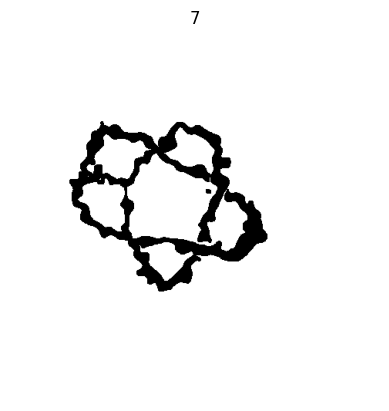

In [ ]:
# show a sample
import matplotlib.pyplot as plt

torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(data.classes[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")
print(data.classes)

In [ ]:
# device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu" # cuda is MUCH faster
device

'cuda'

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

## Vanila

In [ ]:
from torch import nn

# Create a model with non-linear and linear layers
class KnotsModelVanila(nn.Module):
    def __init__(self, input_shape: int, hidden_units_1: int, hidden_units_2: int, output_shape: int): # try to change the number of hidden layers
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units_1),
            nn.GELU(),
            nn.Linear(in_features=hidden_units_1, out_features=hidden_units_2),
            nn.GELU(),
            nn.Linear(in_features=hidden_units_2, out_features=output_shape),
            nn.GELU(),
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [ ]:
model_1 = KnotsModelVanila(input_shape=IMG_SIZE**2, # number of input features
    hidden_units_1=100,
    hidden_units_2=100,
    output_shape=len(data.classes) # number of output classes desired
).to(device) # send model to GPU if it's available
next(model_1.parameters()).device # check model device

device(type='cuda', index=0)

In [ ]:
X, y = data_loader[0]
y_pred =

In [ ]:
# standart functions
from helper_functions import accuracy_fn
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                            lr=0.5) # try to change lr

In [ ]:
# aka training loop
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # Check if the model parameters require gradients
        for param in model.parameters():
          print(f"param.requires_grad: {param.requires_grad}")

        # 1. Forward pass
        y_pred = model(X).softmax(dim=1)
        print(f"y_pred requires_grad: {y_pred.requires_grad}")

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        print(f"loss requires_grad: {loss.requires_grad}")
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

# aka testing loop
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X).softmax(dim=1)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [ ]:
# let's try our model
epochs = 20
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

Epoch: 0
---------
param.requires_grad: True
param.requires_grad: True
param.requires_grad: True
param.requires_grad: True
param.requires_grad: True
param.requires_grad: True
y_pred requires_grad: True


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([38])) that is different to the input size (torch.Size([38, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (10) must match the size of tensor b (38) at non-singleton dimension 1

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

In [ ]:
# Calculate model 1 results with device-agnostic code
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device
                         )
model_1_results

{'model_name': 'KnotsModelVanila',
 'model_loss': 2.3042407035827637,
 'model_acc': 11.839080459770114}

## CNN

In [ ]:
from torch import nn

# Create a convolutional neural network
class KnotsModelCNN(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/

    To understand how it works, I highly recommend you go through the 'Convolutional Neural Networks' section at https://colah.github.io/ (of course, the other articles are very good too, so it's best to read them all!)
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=40, # try to change; how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=9, try to change
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, # try to change
                         stride=4) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 9, padding=1), # try to change kernel_size (3 position here)
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 9, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(4) # try to change
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*9*9, # try to change these multipliers
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = KnotsModelCNN(input_shape=1,
    hidden_units=1000,
    output_shape=len(data.classes)).to(device)
model_2

In [ ]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                             lr=1) # try to change lr here

In [ ]:
torch.manual_seed(42)

# Train and test model
epochs = 10
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

Epoch: 0
---------
Train loss: 2.30233 | Train accuracy: 12.81%
Test loss: 2.30424 | Test accuracy: 11.84%

Epoch: 1
---------
Train loss: 2.30238 | Train accuracy: 12.73%
Test loss: 2.30424 | Test accuracy: 11.84%

Epoch: 2
---------
Train loss: 2.30223 | Train accuracy: 12.79%
Test loss: 2.30424 | Test accuracy: 11.84%

Epoch: 3
---------
Train loss: 2.30239 | Train accuracy: 12.79%
Test loss: 2.30424 | Test accuracy: 11.84%

Epoch: 4
---------
Train loss: 2.30230 | Train accuracy: 12.75%
Test loss: 2.30424 | Test accuracy: 11.84%

Epoch: 5
---------
Train loss: 2.30228 | Train accuracy: 12.81%
Test loss: 2.30424 | Test accuracy: 11.84%

Epoch: 6
---------
Train loss: 2.30228 | Train accuracy: 12.83%
Test loss: 2.30424 | Test accuracy: 11.84%

Epoch: 7
---------
Train loss: 2.30237 | Train accuracy: 12.75%
Test loss: 2.30424 | Test accuracy: 11.84%

Epoch: 8
---------
Train loss: 2.30229 | Train accuracy: 12.79%
Test loss: 2.30424 | Test accuracy: 11.84%

Epoch: 9
---------
Train los

In [ ]:
# Calculate model 2 results with device-agnostic code
model_2_results = eval_model(model=model_2, data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device
                            )
model_2_results